In [1]:
import pandas as pd
train = pd.read_csv("../dataset/train_tokens.csv")
train_token = train.lower
##This part is altered when the tokens change

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
X_train_counts = CountVectorizer(lowercase = False).fit_transform(train_token)
##lowercase = False keeps the original form of the tokens, do not change

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
##Give weight values to the tokens

In [4]:
X = X_train_tfidf.toarray()
y = train.rating
##Converts it to a readable form for train_test_split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.80, random_state=123456)
##Random state keeps the same split everytime

/Users/grahamharris/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
train_acc =[]
test_acc =[]
train_loss =[]
test_loss =[]
values = [i for i in range(1, 21)]

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
for i in values:
    lr = LogisticRegression(max_iter=i)
    lr.fit(X_train,y_train)
    # evaluate on the train dataset
    train_pr = lr.predict(X_train) 
    train_accuracy = accuracy_score(y_train, train_pr)
    train_acc.append(train_accuracy)
    # evaluate on the test dataset
    test_pr = lr.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pr)
    test_acc.append(test_accuracy)
    #calculate loss   
    train_l = log_loss(y_train, train_pr)
    test_l = log_loss(y_test, test_pr)
    train_loss.append(train_l)
    test_loss.append(test_l)
    


/Users/grahamharris/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/grahamharris/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/grahamharris/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/grahamharris/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/grahamharris/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default s

In [8]:
print("Lowercase: Accuracy\n")
for i in values:
    print('Iteration: %d, train: %.3f, test: %.3f' % (i, train_acc[i-1], test_acc[i-1]))

Lowercase: Accuracy

Iteration: 1, train: 0.938, test: 0.896
Iteration: 2, train: 0.934, test: 0.894
Iteration: 3, train: 0.934, test: 0.892
Iteration: 4, train: 0.934, test: 0.892
Iteration: 5, train: 0.934, test: 0.892
Iteration: 6, train: 0.934, test: 0.892
Iteration: 7, train: 0.934, test: 0.892
Iteration: 8, train: 0.934, test: 0.892
Iteration: 9, train: 0.934, test: 0.892
Iteration: 10, train: 0.934, test: 0.892
Iteration: 11, train: 0.934, test: 0.892
Iteration: 12, train: 0.934, test: 0.892
Iteration: 13, train: 0.934, test: 0.892
Iteration: 14, train: 0.934, test: 0.892
Iteration: 15, train: 0.934, test: 0.892
Iteration: 16, train: 0.934, test: 0.892
Iteration: 17, train: 0.934, test: 0.892
Iteration: 18, train: 0.934, test: 0.892
Iteration: 19, train: 0.934, test: 0.892
Iteration: 20, train: 0.934, test: 0.892


In [9]:
print("Lowercase: Loss\n")
for i in values:
    print('Iteration: %d, train: %.3f, test: %.3f' % (i, train_loss[i-1], test_loss[i-1]))

Lowercase: Loss

Iteration: 1, train: 2.128, test: 3.575
Iteration: 2, train: 2.288, test: 3.661
Iteration: 3, train: 2.290, test: 3.722
Iteration: 4, train: 2.271, test: 3.713
Iteration: 5, train: 2.269, test: 3.722
Iteration: 6, train: 2.269, test: 3.713
Iteration: 7, train: 2.269, test: 3.713
Iteration: 8, train: 2.269, test: 3.713
Iteration: 9, train: 2.269, test: 3.713
Iteration: 10, train: 2.269, test: 3.713
Iteration: 11, train: 2.269, test: 3.713
Iteration: 12, train: 2.269, test: 3.713
Iteration: 13, train: 2.269, test: 3.713
Iteration: 14, train: 2.269, test: 3.713
Iteration: 15, train: 2.269, test: 3.713
Iteration: 16, train: 2.269, test: 3.713
Iteration: 17, train: 2.269, test: 3.713
Iteration: 18, train: 2.269, test: 3.713
Iteration: 19, train: 2.269, test: 3.713
Iteration: 20, train: 2.269, test: 3.713


In [10]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Accuracy")
pyplot.plot(values, train_acc, '-o', label='Train')
pyplot.plot(values, test_acc, '-o', label='Test')
pyplot.legend()
pyplot.savefig("lower_accuracy.png",dpi=1200)
pyplot.show()

<Figure size 640x480 with 1 Axes>

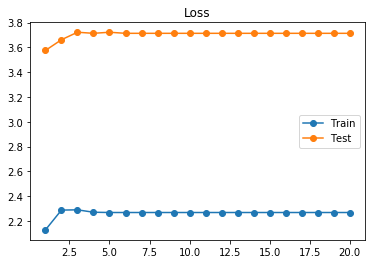

In [11]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Loss")
pyplot.plot(values, train_loss, '-o', label='Train')
pyplot.plot(values, test_loss, '-o', label='Test')
pyplot.legend()
pyplot.savefig("lower_loss.png",dpi=1200)
pyplot.show()

In [12]:
###ignore below here##

In [13]:
#from sklearn.metrics import accuracy_score, classification_report

In [14]:
#y_predict = lr.predict(X_test)
##we will change this line when running to the test file after adjusting the max_iter

In [15]:
##print('Logistic Regression Train accuracy %s' % lr.score(X_train, y_train)) #Train accuracy
#print('Logistic Regression Test accuracy %s' % accuracy_score(y_predict, y_test)) #Test=Validation accuracy